In [1]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

arrests_by_neighborhood = df.groupby('INCIDENTNEIGHBORHOOD').count()[df.columns[0]].reset_index()
arrests_by_neighborhood.columns = ['INCIDENTNEIGHBORHOOD', 'Number of Arrests']

sorted_arrests = arrests_by_neighborhood.sort_values(by='Number of Arrests', ascending=False)

pd.set_option('display.max_rows', None)

print(sorted_arrests.to_string (index=False))

       INCIDENTNEIGHBORHOOD  Number of Arrests
  Central Business District               4439
           South Side Flats               3496
                    Carrick               2351
             East Allegheny               2217
             Homewood South               2090
             Homewood North               1968
               East Liberty               1889
         Marshall-Shadeland               1516
                      Bluff               1502
           Mount Washington               1434
                  Hazelwood               1396
                  Brookline               1389
   Lincoln-Lemington-Belmar               1362
                  Knoxville               1336
                   Sheraden               1285
           Allegheny Center               1244
                  Beechview               1201
                 East Hills               1194
           Brighton Heights               1114
                Perry South               1057
             

In [2]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

last_index_value = df.index[-1]

print("We are looking at:", last_index_value ,"arrests across Pittsburgh. This dataset ended 11/14/2023")

We are looking at: 66470 arrests across Pittsburgh. This dataset ended 11/14/2023


In [7]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

time = df.sort_values(by='ARRESTTIME')

print(time.loc[time.index[0], 'ARRESTTIME'])

print(time.loc[time.index[-1], 'ARRESTTIME'])

1998-03-11T11:30:00
2023-11-14T03:00:00


Text(0, 0.5, 'Number of Arrests')

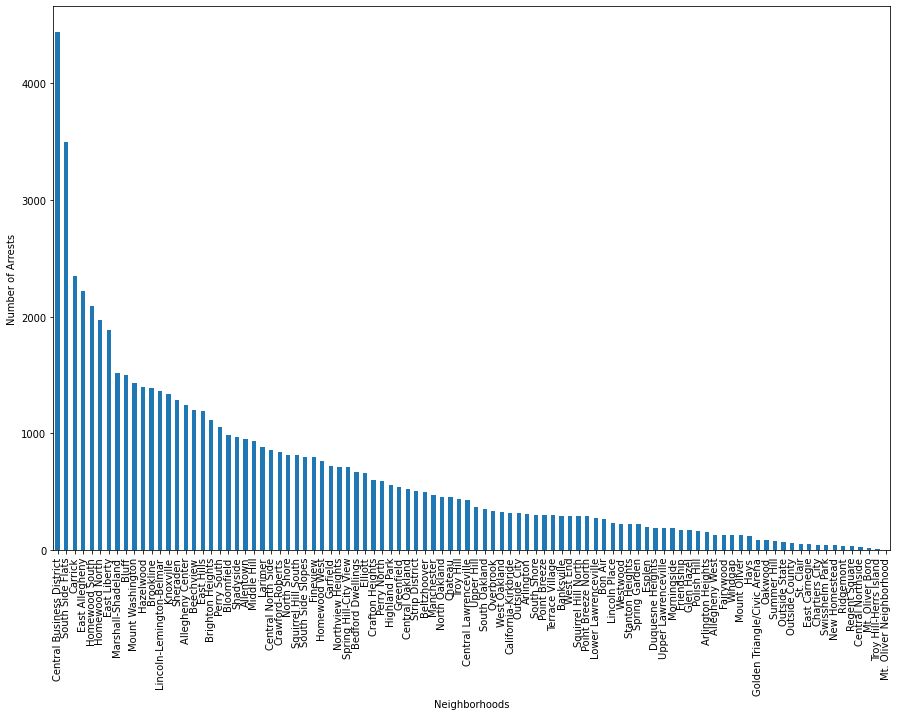

In [14]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

arrests_by_neighborhood = df.groupby('INCIDENTNEIGHBORHOOD').size().reset_index()
arrests_by_neighborhood.columns = ['INCIDENTNEIGHBORHOOD', 'Number of Arrests']

sorted_arrests = arrests_by_neighborhood.sort_values(by='Number of Arrests', ascending=False)

chart = sorted_arrests.plot.bar(x='INCIDENTNEIGHBORHOOD', y='Number of Arrests', legend=None, figsize= (15,10))

chart.set_xlabel('Neighborhoods')
chart.set_ylabel('Number of Arrests')

In [18]:
#sorting crime data by most prevalent offenses per neighborhood and how many times that offense occured

import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

offensesperneighborhood = df.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSES']).size().reset_index()

offensesperneighborhood.columns = ['INCIDENTNEIGHBORHOOD', 'OFFENSES', 'Count']



sort = offensesperneighborhood.sort_values(by=['INCIDENTNEIGHBORHOOD', 'Count'], ascending=[True, False])

neighborhoods = sort['INCIDENTNEIGHBORHOOD'].unique()
for neighborhood in neighborhoods:
    print(f"\n{neighborhood}:")
    top3offenses = sort[sort['INCIDENTNEIGHBORHOOD'] == neighborhood].head(3)
    for index, row in top3offenses.iterrows():
        print(f"{row['OFFENSES']}: {row['Count']} occurrences")



Allegheny Center:
9015 Failure To Appear/Arrest on Attachment Order: 114 occurrences
13(a)(32) Paraphernalia - Use or Possession: 108 occurrences
9501 Bench Warrant: 92 occurrences

Allegheny West:
9501 Bench Warrant: 9 occurrences
2701 Simple Assault.: 6 occurrences
9015 Failure To Appear/Arrest on Attachment Order: 6 occurrences

Allentown:
2701 Simple Assault.: 94 occurrences
9501 Bench Warrant: 65 occurrences
9015 Failure To Appear/Arrest on Attachment Order: 52 occurrences

Arlington:
2701 Simple Assault.: 47 occurrences
9015 Failure To Appear/Arrest on Attachment Order: 16 occurrences
9501 Bench Warrant: 13 occurrences

Arlington Heights:
2701 Simple Assault.: 18 occurrences
901 Criminal Attempt / 903 Criminal Conspiracy. / 2702 Aggravated Assault.: 10 occurrences
2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck: 7 occurrences

Banksville:
2701 Simple Assault.: 30 occurrences
9015 Failure To Appear/Arrest on Attachment Order: 14 occurrenc

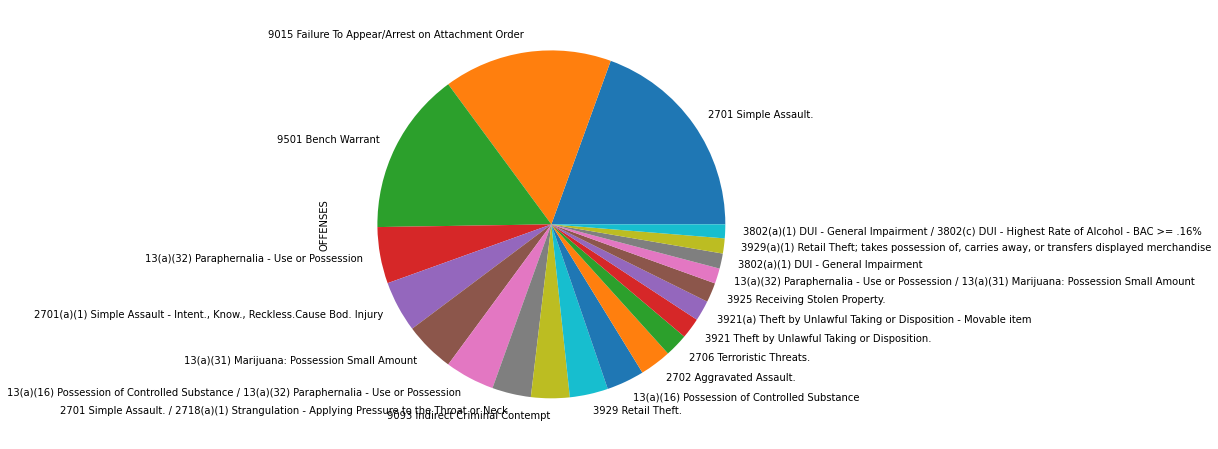

In [15]:
import pandas as pd

path = 'crime.csv'
df = pd.read_csv(path)

topoffenses = df["OFFENSES"].value_counts().nlargest(20)


topoffenses.plot.pie(figsize=(8, 8))



Text(0, 0.5, 'Population Size')

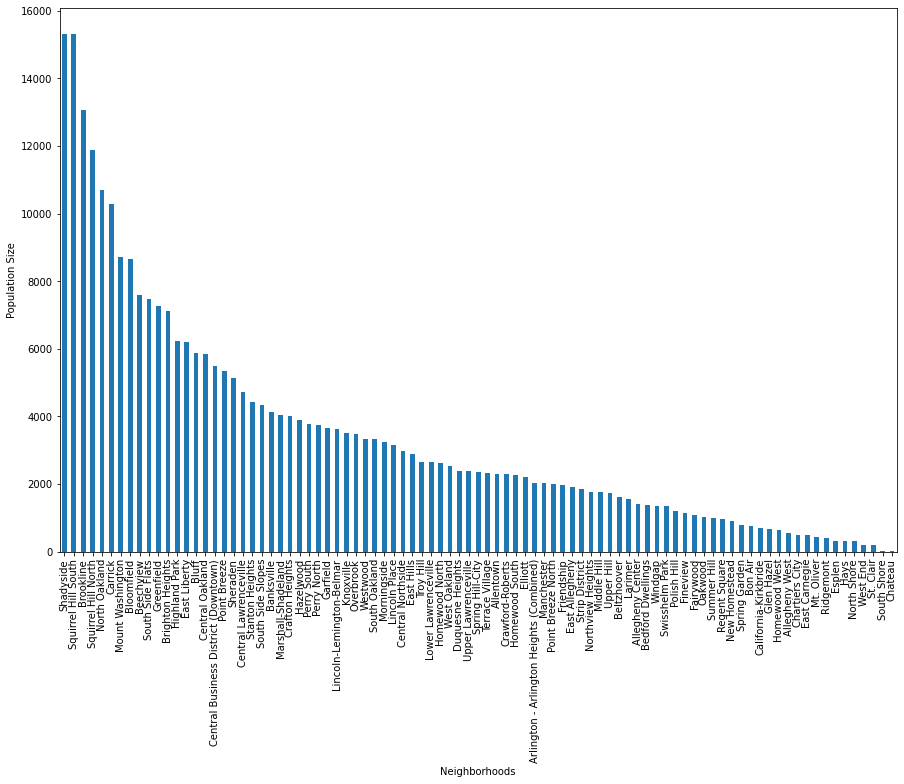

In [11]:
import pandas as pd

path = 'population.csv'
pop = pd.read_csv(path)

sortedpopulation = pop.sort_values(by='2020_Total_Population', ascending=False)

chart = sortedpopulation.plot.bar(x='Neighborhood', y='2020_Total_Population', legend=None, figsize= (15,10))

chart.set_xlabel('Neighborhoods')
chart.set_ylabel('Population Size')




In [11]:
import pandas as pd

crime = 'crime.csv'
pop = 'population.csv'

crimedf= pd.read_csv(crime)
popdf = pd.read_csv(pop)

merged = pd.merge(crimedf, popdf, left_on='INCIDENTNEIGHBORHOOD', right_on='Neighborhood', how='inner')

# Calculate total number of crimes for each neighborhood
crime_counts = merged.groupby('Neighborhood').size().reset_index(name='crime_count')

# Calculate crime rate for each neighborhood
crime_counts['crime_rate'] = crime_counts['crime_count'] / crime_counts['2020_Total_Population']

print(crime_counts)




KeyError: '2020_Total_Population'

In [3]:
import pandas as pd

path = 'population.csv'
pop = pd.read_csv(path)

pop_2010 = pop['2010_Total_Population'].sum()
pop_2020= pop['2020_Total_Population'].sum()


print("Pittsburgh's population in 2010 was" ,pop_2010,". In 2020, Pittsburgh's population was", pop_2020, ". This reveals that Pittsburgh's population has decreased by", pop_2020-pop_2010, "over ten years.")


Pittsburgh's population in 2010 was 305704 . In 2020, Pittsburgh's population was 302971 . This reveals that Pittsburgh's population has decreased by -2733 over ten years.


What to add: 
-line graph displaying increase in population
-crime rate for 2010 and 2020 
-Line graph showing the increase or decrease in crime from 2010 to 2020
